<a href="https://colab.research.google.com/github/prasanna-venkatesh-m/penguin-species-clustering/blob/main/DBSCAN_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('/content/penguins.csv')

In [3]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.shape

(344, 5)

In [5]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [7]:
print(df.isnull().sum())

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64


In [8]:
drop_df = df.dropna()

In [9]:
drop_df.isnull().sum()

,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [10]:
drop_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [11]:
print(drop_df.isnull().sum())

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [12]:
drop_df[drop_df["flipper_length_mm"] > 4000]
drop_df[drop_df["flipper_length_mm"] < 0]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
14,34.6,21.1,-132.0,4400.0,MALE


In [13]:
cleaned_data = drop_df.drop(drop_df[drop_df["flipper_length_mm"] > 4000].index)
cleaned_data = cleaned_data.drop(cleaned_data[cleaned_data["flipper_length_mm"] < 0].index)

In [14]:
cleaned_data.isnull().sum()

,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [15]:
cleaned_data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [16]:
ohe = OneHotEncoder()
o = ohe.fit_transform(cleaned_data[['sex']])
ohe_df = pd.DataFrame(o.toarray(), columns=ohe.get_feature_names_out(['sex']))
ohe_df.head()

,sex_.,sex_FEMALE,sex_MALE
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0


In [17]:
ohe_df.isnull().sum()

,0
sex_.,0
sex_FEMALE,0
sex_MALE,0


In [18]:
ohe_data = pd.concat([cleaned_data.reset_index(drop=True), ohe_df.reset_index(drop=True)], axis=1)

In [19]:
ohe_data.isnull().sum()

,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0
sex_.,0
sex_FEMALE,0
sex_MALE,0


In [20]:
ohe_data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,sex_.,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,MALE,0.0,0.0,1.0
1,39.5,17.4,186.0,3800.0,FEMALE,0.0,1.0,0.0
2,40.3,18.0,195.0,3250.0,FEMALE,0.0,1.0,0.0
3,36.7,19.3,193.0,3450.0,FEMALE,0.0,1.0,0.0
4,39.3,20.6,190.0,3650.0,MALE,0.0,0.0,1.0


In [21]:
removed_data = ohe_data.drop(columns=['sex','sex_.'])

In [22]:
removed_data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0.0,1.0
1,39.5,17.4,186.0,3800.0,1.0,0.0
2,40.3,18.0,195.0,3250.0,1.0,0.0
3,36.7,19.3,193.0,3450.0,1.0,0.0
4,39.3,20.6,190.0,3650.0,0.0,1.0


In [23]:
sc = StandardScaler()

In [24]:
scaled_data = sc.fit_transform(removed_data)

In [25]:
scaled_data

array([[-0.90552018,  0.79312591, -1.42812496, -0.56970896, -0.99103121,
         0.99700149],
       [-0.83193838,  0.12850298, -1.07152207, -0.50757924,  1.00904996,
        -1.00300753],
       [-0.68477478,  0.43525202, -0.42963687, -1.1910061 ,  1.00904996,
        -1.00300753],
       ...,
       [ 1.17316569, -0.74061931,  1.49601872,  1.91547962, -0.99103121,
         0.99700149],
       [ 0.21660228, -1.20074288,  0.78281295,  1.23205276,  1.00904996,
        -1.00300753],
       [ 1.08118844, -0.53611995,  0.85413352,  1.48057162, -0.99103121,
         0.99700149]])

In [26]:
data = pd.DataFrame(scaled_data, columns=removed_data.columns)
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   333 non-null    float64
 1   culmen_depth_mm    333 non-null    float64
 2   flipper_length_mm  333 non-null    float64
 3   body_mass_g        333 non-null    float64
 4   sex_FEMALE         333 non-null    float64
 5   sex_MALE           333 non-null    float64
dtypes: float64(6)
memory usage: 15.7 KB


In [28]:
data.isnull().sum()

,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex_FEMALE,0
sex_MALE,0


In [29]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

In [30]:
new_data = pd.DataFrame(pca_data)
new_data

,0,1
0,-0.729521,2.097192
1,-1.929304,-0.412150
2,-1.953525,-0.308485
3,-2.288178,0.158278
4,-0.621822,2.514020
...,...,...
328,0.655653,-2.577632
329,0.562064,-2.387538
330,3.085743,-0.399018
331,0.512527,-2.218491


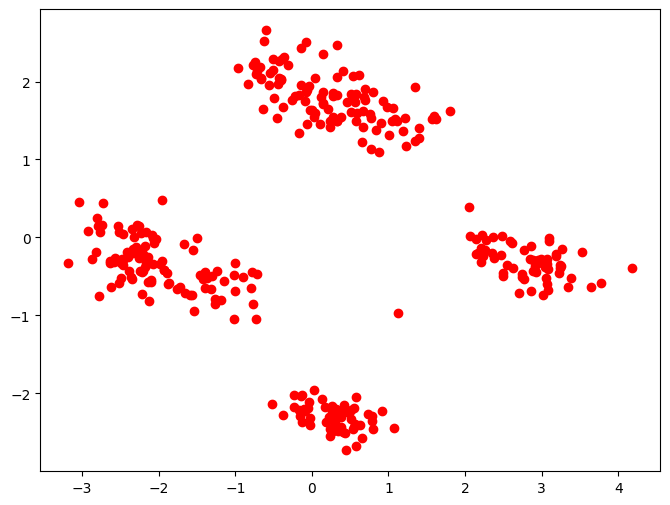

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(new_data[0], new_data[1], c='r')
plt.show()

In [32]:
dbs = DBSCAN(eps=0.5, min_samples=6)
dbs.fit(new_data)

DBSCAN(min_samples=6)

In [57]:
print(len(dbs.labels_))
print(new_data[0].shape)
print(new_data[1].shape)

333
(333,)
(333,)


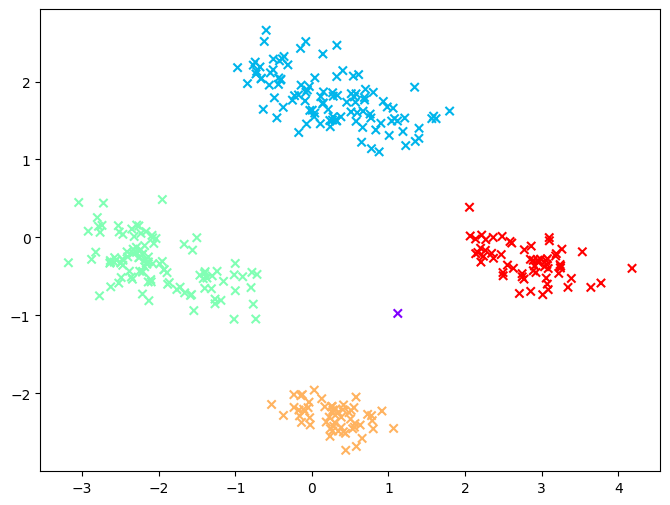

In [53]:
plt.figure(figsize=(8,6))
plt.scatter(new_data[0], new_data[1], c=dbs.labels_, cmap="rainbow", marker='x')
plt.show()

In [34]:
silhouette_score(new_data, dbs.labels_)

np.float64(0.6861290554071767)

In [94]:
data = []

for i in range(1,51):
  x = np.random.uniform(1, 2)
  y = np.random.uniform(-1, -1.5)
  data.append([x,y])

test_data = pd.DataFrame(data)

In [95]:
predict_data = pd.concat([test_data, new_data], axis=0)
predict_data.shape

(383, 2)

In [96]:
dbs.fit_predict(predict_data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1,
       2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1,
       2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 3,
       4, 3, 4, 4, 3, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 4, 3, 3,
       4, 3, 4, 4, 3, 4, 4, 3, 3, 4, 3, 4, 3, 4, 3,

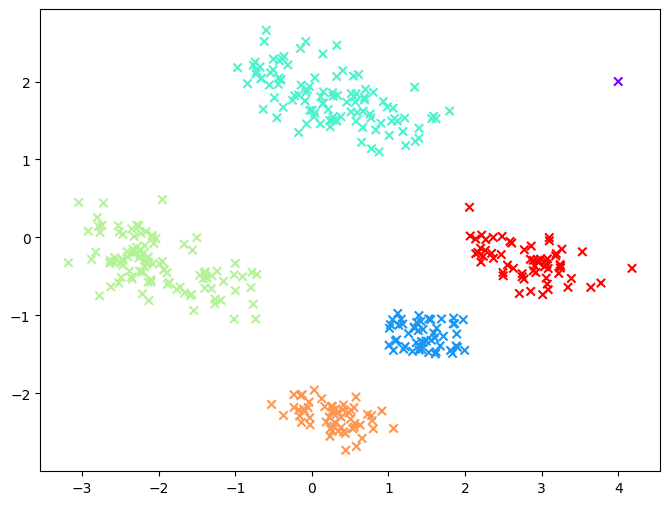

In [102]:
dbs.fit_predict(predict_data)
plt.figure(figsize=(8,6))
plt.scatter(predict_data[0], predict_data[1], c=dbs.labels_, cmap="rainbow", marker='x')
plt.show()

In [100]:
new_row = pd.DataFrame([[4,2]])
predict_data = pd.concat([predict_data, new_row], axis=0)
predict_data.shape

(384, 2)

In [116]:
predicted = dbs.fit_predict(predict_data)
print(np.where(predicted == -1)[0])
print(predict_data.iloc[383, :])

[383]
0    4.0
1    2.0
Name: 0, dtype: float64


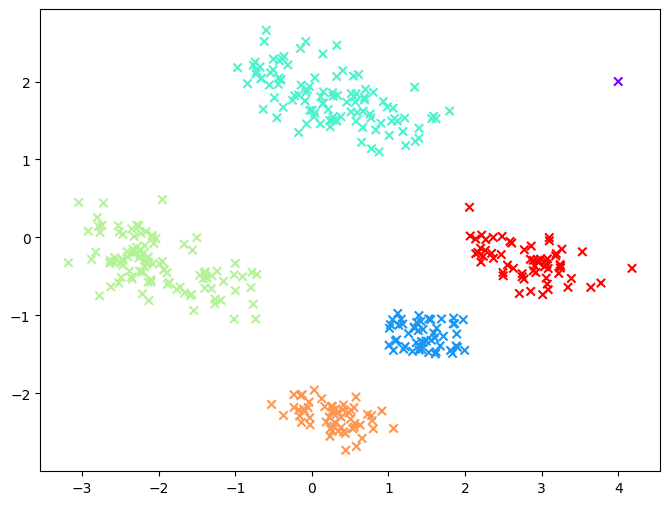

In [103]:
plt.figure(figsize=(8,6))
plt.scatter(predict_data[0], predict_data[1], c=dbs.labels_, cmap="rainbow", marker='x')
plt.show()